# Implementing an LSTM Model Over Streamflow
@author: Carson DeSotel  
@date: 2021-11-13  

17352


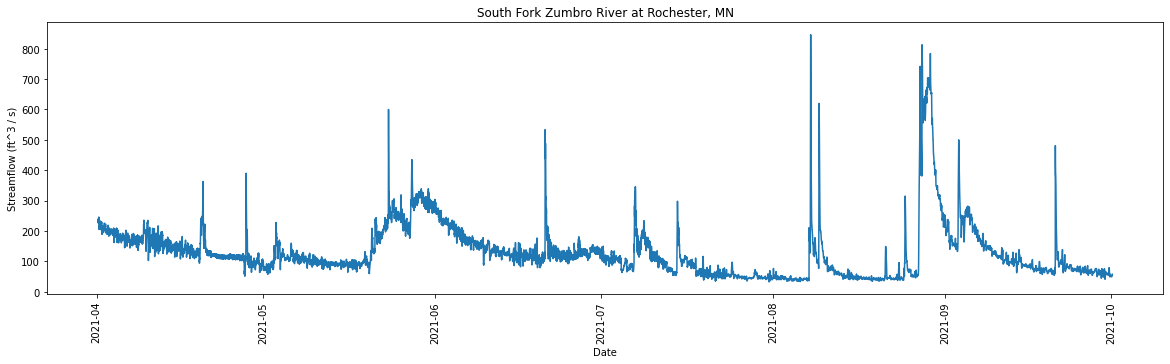

4347


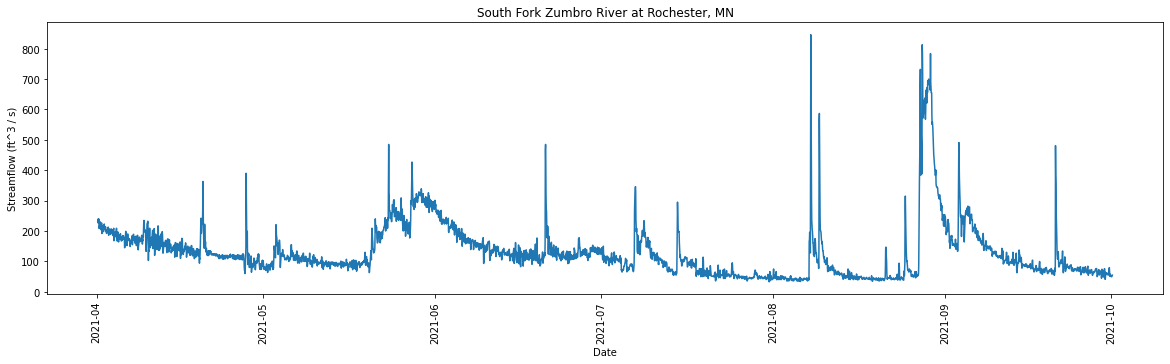

In [32]:
'''
    Get Time Series Data
'''
### Import Modules
from climata.usgs import InstantValueIO
import matplotlib.pyplot as plt
import pandas as pd
import datetime

### Define Target Stream
_TARGET     = '05372995'

### Define NWIS Code for Streamflow data
_STREAMFLOW = '00060'

### Define Date Ranges for Data Collection as Immutable Tuples
date_ranges = [('2021-04-01', '2021-09-30'), ]

for date_range in date_ranges:
    ### Get Streamflow Data in date_range
    flow_data = InstantValueIO(
        start_date = date_range[0], # get starting date
        end_date   = date_range[1], # get ending date
        station    = _TARGET,       # get target stream     
        parameter  = _STREAMFLOW,   # plug in streamflow code (ft^3 / s)
    )
    
    for flow_series in flow_data:
        flow    = [r[1] for r in flow_series.data]
        dates  = [r[0] for r in flow_series.data]

### Convert to Pandas Series Objects
dates = pd.Series(pd.to_datetime(dates, 
                                 utc = True))
flow   = pd.Series(flow)

### Construct DataFrame from Pandas Series
df = { 'Dates': dates, 
       'Flow' : flow }
df = pd.DataFrame(df)

### Print Length to Show Difference in Data Size
print(len(df['Dates']))

### Plot Original Figure
plt.figure(figsize=(20, 5)) # width, height
plt.plot(df['Dates'], df['Flow']) # y-axis, x-axis
plt.xlabel('Date')
plt.ylabel('Streamflow (ft^3 / s)')
plt.title('South Fork Zumbro River at Rochester, MN')
plt.xticks(rotation='vertical')
plt.show()

### Filter DataFrame to Only Hourly Values
df = df[df['Dates'].dt.minute == 0]
        
### Print Length to Show Difference in Data Size
print(len(df['Dates']))

### Plot Hourly Figure
plt.figure(figsize=(20, 5)) # width, height
plt.plot(df['Dates'], df['Flow']) # y-axis, x-axis
plt.xlabel('Date')
plt.ylabel('Streamflow (ft^3 / s)')
plt.title('South Fork Zumbro River at Rochester, MN')
plt.xticks(rotation='vertical')
plt.show()

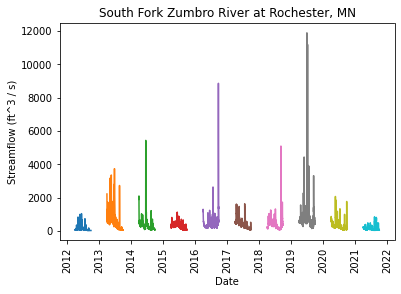

In [50]:
'''
    Extract a few years data
'''

### Define 5 Year Range
date_ranges = [('2012-04-01', '2012-09-30'),
               ('2013-04-01', '2013-09-30'),
               ('2014-04-01', '2014-09-30'),
               ('2015-04-01', '2015-09-30'),
               ('2016-04-01', '2016-09-30'),
               ('2017-04-01', '2017-09-30'),
               ('2018-04-01', '2018-09-30'),
               ('2019-04-01', '2019-09-30'),
               ('2020-04-01', '2020-09-30'),
               ('2021-04-01', '2021-09-30'), ]

index = 0 # set index counter
for date_range in date_ranges:
    ### Get Streamflow Data in date_range
    flow_data = InstantValueIO(
        start_date = date_range[0], # get starting date
        end_date   = date_range[1], # get ending date
        station    = _TARGET,       # get target stream     
        parameter  = _STREAMFLOW,   # plug in streamflow code (ft^3 / s)
    )
    
    ### Gather Flow Series data
    for flow_series in flow_data:
        flow    = [r[1] for r in flow_series.data]
        dates  = [r[0] for r in flow_series.data]
        
        ### Convert to Pandas Series Objects
        dates = pd.Series(pd.to_datetime(dates, utc = True))
        flow   = pd.Series(flow)

        ### Construct DataFrame from Pandas Series
        df = { 'Dates': dates, 
               'Flow' : flow }
        df = pd.DataFrame(df)

        ### Filter DataFrame to Only Hourly Values
        df = df[df['Dates'].dt.minute == 0]

        ### Plot Each DataFrame
        plt.plot(df['Dates'], df['Flow']) # y-axis, x-axis
        plt.xlabel('Date')
        plt.ylabel('Streamflow (ft^3 / s)')
        plt.title('South Fork Zumbro River at Rochester, MN')
        plt.xticks(rotation='vertical')